## **Data-Driven Real Estate: Classifying properties based on investment potential**

   
**Data sources**:
 
- *Zillow, Datarade, Realtor, National Association of Realtors (NAR), U.S. Census Bureau.*

**Summary**:


- **Objective**: *The primary goal of this project is to create a Machine Learning Classifier that categorizes properties based on the Return On Investment (ROI), dividing them into three categories:*  

    - *'No investment potential (NIP)',*
    - *'Moderate investment potential (MIP)',*
    - *'High investment potencial (HIP)'.*

***ROI**: Return on investment, or ROI, is a mathematical formula that investors can use to evaluate their investments and judge how well a particular investment has performed compared to others.*

- **Exploratory Data Analysis (EDA)**:
    
    - *Collect and clean data on properties, including price, location, size and amenities, from sources like Zillow and Realtor.*

    - *Analyze the distribution of property values and investment trends by region and others variables.*

    - *Explore correlations between property features and ROI to identify the key determinants of investment potential.*

    - *Visualize trends and patterns in property investment returns across different geographical areas.*

- **Machine Learning approach**:

    - **Model development**: *Use classification algorithms (e.g., decision trees, random forests, logistic regression) to build the investment potential classifier.*

    - **Feature engineering**: *Create new variables that capture important aspects of property investment. These features are designed to enhance the model's ability to predict ROI by better representing the factors that influence property value.*

    - **Model evaluation**: *Assess model performance using metrics such as accuracy, precision, recall and F1 score to ensure reliable predictions.*

- **Potential impact**:
    - *This project aims to assist investors in identifying lucrative properties by providing data-driven insights into the investment potential of various real estate assets.*

    - *The classifier can help real estate professionals make informed decisions on property investments, ultimately improving portfolio performance.*

In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import display_functions as dpf

import plotly.express as px
import folium
import json
import requests
import folium
from folium.plugins import MarkerCluster

from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr

import importlib
importlib.reload(dpf)

import warnings
warnings.filterwarnings('ignore');

### 1. Load and visualisation of the dataset

In [266]:
# Loads the DataFrame we are going to work with.
housing_us = pd.read_csv("../data/real_estate_us.csv")

In [267]:
housing_us.head(10)

,property_id,state,city,price,area_sqft,bedrooms,bathrooms,lot_size_acres,year_built,rental_income,mainroad_access,airconditioning,garage_parking,school_rating,walkability_score,preferred_area,tax_rate,maintenance_cost
0,1,California,San Diego,2638547.0,667.0,NaN,3.0,0.43,1955,12880.0,Yes,No,2.0,2.0,31.0,No,2.49,5711.0
1,2,Nevada,Henderson,1093731.0,965.0,4.0,4.0,3.24,1973,3857.0,Yes,Yes,0.0,6.0,10.0,Yes,2.58,6194.0
2,3,Texas,Dallas,849545.0,3218.0,5.0,2.0,4.59,1989,2901.0,No,No,1.0,3.0,79.0,Yes,0.55,6045.0
3,4,California,San Diego,1362633.0,2298.0,NaN,4.0,3.83,2001,3589.0,Yes,No,0.0,NaN,28.0,Yes,1.63,1001.0
4,5,Texas,Houston,950855.0,2612.0,4.0,2.0,2.93,2006,2342.0,Yes,No,3.0,3.0,20.0,No,0.67,2954.0
5,6,Arizona,Tucson,920073.0,2470.0,2.0,2.0,1.47,2018,4146.0,No,No,NaN,3.0,38.0,Yes,0.70,5610.0
6,7,California,San Diego,1380429.0,4368.0,2.0,1.0,2.04,1995,3572.0,No,Yes,1.0,2.0,32.0,No,0.76,4594.0
7,8,Arizona,Scottsdale,NaN,4592.0,5.0,3.0,0.19,2005,10045.0,No,No,0.0,2.0,6.0,Yes,2.00,3312.0
8,9,Georgia,Atlanta,1491201.0,3091.0,4.0,3.0,3.59,1998,6160.0,Yes,No,3.0,1.0,17.0,Yes,0.68,5579.0
9,10,Illinois,Chicago,702736.0,4761.0,NaN,4.0,1.17,2004,NaN,No,No,3.0,5.0,36.0,Yes,0.85,3418.0


In [268]:
housing_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15108 entries, 0 to 15107
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   property_id        15108 non-null  int64  
 1   state              15108 non-null  object 
 2   city               15108 non-null  object 
 3   price              14051 non-null  float64
 4   area_sqft          14051 non-null  float64
 5   bedrooms           14051 non-null  float64
 6   bathrooms          14051 non-null  float64
 7   lot_size_acres     15108 non-null  float64
 8   year_built         15108 non-null  int64  
 9   rental_income      14051 non-null  float64
 10  mainroad_access    15108 non-null  object 
 11  airconditioning    15108 non-null  object 
 12  garage_parking     14051 non-null  float64
 13  school_rating      14051 non-null  float64
 14  walkability_score  14051 non-null  float64
 15  preferred_area     15108 non-null  object 
 16  tax_rate           140

In [269]:
housing_us.describe()

,property_id,price,area_sqft,bedrooms,bathrooms,lot_size_acres,year_built,rental_income,garage_parking,school_rating,walkability_score,tax_rate,maintenance_cost
count,15108.000000,1.405100e+04,14051.000000,14051.000000,14051.000000,15108.000000,15108.000000,14051.000000,14051.000000,14051.000000,14051.000000,14051.000000,14051.000000
mean,7554.500000,1.035512e+06,2803.738026,2.982635,2.511850,2.535978,1985.978621,3619.710910,1.498043,5.541670,50.370863,1.747003,4010.945627
std,4361.448269,9.033192e+05,1267.764739,1.409620,1.117342,1.411356,20.954755,3363.408439,1.119758,2.872478,28.822031,0.723091,1727.845419
min,1.000000,2.005950e+05,600.000000,1.000000,1.000000,0.100000,1950.000000,424.000000,0.000000,1.000000,1.000000,0.500000,1000.000000
25%,3777.750000,4.989985e+05,1705.000000,2.000000,2.000000,1.310000,1968.000000,1646.000000,0.000000,3.000000,26.000000,1.120000,2535.500000
50%,7554.500000,7.352630e+05,2803.000000,3.000000,3.000000,2.540000,1986.000000,2541.000000,2.000000,6.000000,50.000000,1.740000,4020.000000
75%,11331.250000,1.166840e+06,3908.000000,4.000000,4.000000,3.750000,2004.000000,4176.500000,2.000000,8.000000,75.000000,2.380000,5494.000000
max,15108.000000,5.939204e+06,4999.000000,5.000000,4.000000,5.000000,2022.000000,28518.000000,3.000000,10.000000,100.000000,3.000000,6999.000000


#### 1.1. Description of what each column of the dataset represents

|COLUMN|MEANING|DATA TYPE|NOTE|EXAMPLE|
|---|---|---|---|---|
|**property_id**|*Unique identifier for each property*|*Integer*|*Used only as a reference; irrelevant for modeling*||
|**state**|*The state within the United States where the property is located*|*Categorical*||*California, Texas*|
|**city**|*The specific city within the state where the property is located*|*Categorical*||*Los Angeles, Austin*|
|**price**|*Sale price of the property*|*Continuous numeric*|**Unit**: *US Dollars (USD)*|*$400,000, $1,200,000*|
|**area_sqft**|*The livable area of the property in square feet*|*Continuous numeric*|**Unit**: *Square feet (sqft)*|*2,000 sqft, 3,500 sqft*|
|**bedrooms**|*Total number of bedrooms in the property*|*Discrete numeric*||*2, 4*|
|**bathrooms**|*Total number of bathrooms in the property*|*Discrete numeric*|*Full bathrooms (including shower) count as 1, toilets without shower count 0.5*|*1, 2.5*|
|**lot_size_acres**|*The size of the lot, in acres, on which the property is built*|*Continuous numeric*|**Unit**: *Acres. 1 acre = 43560 sqft*|*0.25, 1.5*|
|**year_built**|*The year the property was constructed*|*Integer*||*1995, 2010*|
|**rental_income**|*Estimated monthly rental income from the property*|*Continuous numeric*|**Unit**: *US Dollars (USD)*|*$1,500, $3,200*|
|**mainroad_access**|*Indicates whether the property has direct access to a main road*|*Binary categorical*||*Yes, No*|
|**airconditioning**|*Indicates whether the property is equipped with an air conditioning system*|*Binary categorical*||*Yes, No*|
|**garage_parking**|*Number of parking spaces available in the garage*|*Discrete numeric*||*0, 2*|
|**school_rating**|*Average rating of nearby schools*|*Discrete numeric*|*From 1 (worst) to 10 (best)*|*5, 9*|
|**walkability_score**|*Walkability score, indicating how close essential services are*|*Discrete numeric*|*From 1 (low accessibility) to 100 (high accessibility)*|*70, 85*|
|**preferred_area**|*Indicates whether the property is located in a preferred or high-demand area*|*Binary categorical*||*Yes, No*|
|**tax_rate**|*Property tax rate*|*Continuous numeric*|**Unit**: *Percentage (%)*|*1.2%, 2.5%*|
|**maintenance_cost**|*Estimated annual maintenance cost of the property*|*Continuous numeric*|**Unit**: *US Dollars (USD)*|*$2,000, $5,000*|

### 2. Data preprocessing

Let's transform our project in a supervised classificator, so we need to create some columns.

- ROI COLUMN:

![ROI_formula.jpg](..\img\ROI_formula.jpg)

So we have the following formula:

In [270]:
# Calculate the Return On Investment (ROI) as a new column
# ROI = ((rental_income * 12) - maintenance_cost - (price * tax_rate / 100)) / price * 100
housing_us["ROI"] = ((housing_us["rental_income"] * 12) - housing_us["maintenance_cost"] - (housing_us["price"] * housing_us["tax_rate"] / 100)) / housing_us["price"] * 100

# Check the first few rows to verify the calculation
housing_us[["price", "rental_income", "maintenance_cost", "tax_rate", "ROI"]].head()

,price,rental_income,maintenance_cost,tax_rate,ROI
0,2638547.0,12880.0,5711.0,2.49,3.151325
1,1093731.0,3857.0,6194.0,2.58,1.085435
2,849545.0,2901.0,6045.0,0.55,2.836166
3,1362633.0,3589.0,1001.0,1.63,1.457185
4,950855.0,2342.0,2954.0,0.67,1.974988


In [271]:
# Remove column 'property_id', because it contributes nothing
housing_us.drop(columns=["property_id"], inplace = True)

In [272]:
housing_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15108 entries, 0 to 15107
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              15108 non-null  object 
 1   city               15108 non-null  object 
 2   price              14051 non-null  float64
 3   area_sqft          14051 non-null  float64
 4   bedrooms           14051 non-null  float64
 5   bathrooms          14051 non-null  float64
 6   lot_size_acres     15108 non-null  float64
 7   year_built         15108 non-null  int64  
 8   rental_income      14051 non-null  float64
 9   mainroad_access    15108 non-null  object 
 10  airconditioning    15108 non-null  object 
 11  garage_parking     14051 non-null  float64
 12  school_rating      14051 non-null  float64
 13  walkability_score  14051 non-null  float64
 14  preferred_area     15108 non-null  object 
 15  tax_rate           14051 non-null  float64
 16  maintenance_cost   140

### 2. Train - Test split

*Before proceeding we should split our data in two parts: Train and Test.*

In [273]:
target = 'ROI'

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing_us, test_size = 0.2, random_state = 42)

### 3. Imputation of null values

In [274]:
# Step 1: Impute 'price' based on state, city, bedrooms, and area_sqft
median_price = train_set.groupby(["state", "city", "bedrooms"])["price"].transform("median")

train_set["price"] = train_set.apply(
    lambda row: row["price"] if not pd.isnull(row["price"]) else median_price[row.name],
    axis = 1)

# Step 2: Impute 'area_sqft' based on bedrooms and bathrooms
median_area = train_set.groupby(["bedrooms", "bathrooms"])["area_sqft"].transform("median")

train_set["area_sqft"] = train_set.apply(
    lambda row: row["area_sqft"] if not pd.isnull(row["area_sqft"]) else median_area[row.name],
    axis = 1)

# Step 3: Impute 'bedrooms' based on area_sqft
median_bedrooms = train_set.groupby(["area_sqft"])["bedrooms"].transform("median")

train_set["bedrooms"] = train_set.apply(
    lambda row: row["bedrooms"] if not pd.isnull(row["bedrooms"]) else median_bedrooms[row.name],
    axis = 1)

# Step 4: Impute 'bathrooms' based on bedrooms
median_bathrooms = train_set.groupby(["bedrooms"])["bathrooms"].transform("median")

train_set["bathrooms"] = train_set.apply(
    lambda row: row["bathrooms"] if not pd.isnull(row["bathrooms"]) else median_bathrooms[row.name],
    axis = 1)

# Step 5: Impute 'rental_income' based on price and location (state and city)
median_rental = train_set.groupby(["state", "city"]).apply(
    lambda group: (group["rental_income"] / group["price"]).median())

train_set["rental_income"] = train_set.apply(
    lambda row: row["rental_income"] if not pd.isnull(row["rental_income"]) else row["price"] * median_rental[row["state"], row["city"]],
    axis = 1)

# Step 6: Impute 'school_rating' based on state and city
median_school_rating = train_set.groupby(["state", "city"])["school_rating"].transform("median")

train_set["school_rating"] = train_set.apply(
    lambda row: row["school_rating"] if not pd.isnull(row["school_rating"]) else median_school_rating[row.name],
    axis = 1)

# Step 7: Impute 'tax_rate' based on state
median_tax_rate = train_set.groupby("state")["tax_rate"].transform("median")
train_set["tax_rate"] = train_set.apply(
    lambda row: row["tax_rate"] if not pd.isnull(row["tax_rate"]) else median_tax_rate[row.name],
    axis = 1)

# Step 8: Impute 'maintenance_cost' based on price and area_sqft
train_set["maintenance_cost"] = train_set.apply(
    lambda row: row["maintenance_cost"] if not pd.isnull(row["maintenance_cost"]) else (row["price"] * 0.005) + (row["area_sqft"] * 0.1),
    axis = 1)

# Step 9: Recalculate 'ROI' using the formula
train_set["ROI"] = train_set.apply(
    lambda row: row["ROI"]
    if not pd.isnull(row["ROI"])
    else (
        (row["rental_income"] * 12 - row["maintenance_cost"] - (row["price"] * row["tax_rate"] / 100))
        / row["price"]) * 100,
    axis = 1)

# Verify that all specified columns are fully imputed
train_set.isnull().sum()


state                  0
city                   0
price                 59
area_sqft            123
bedrooms             125
bathrooms              5
lot_size_acres         0
year_built             0
rental_income          8
mainroad_access        0
airconditioning        0
garage_parking       853
school_rating          0
walkability_score    849
preferred_area         0
tax_rate               0
maintenance_cost      11
ROI                   67
dtype: int64

*We still have nulls. As our dataset is quite large, we are going to eliminate the rows that still have nulls, since it is preferable to eliminate certain data than to invent data that does not resemble reality and negatively affect our project.*

In [275]:
train_set.dropna(inplace = True)

train_set.isnull().sum()

state                0
city                 0
price                0
area_sqft            0
bedrooms             0
bathrooms            0
lot_size_acres       0
year_built           0
rental_income        0
mainroad_access      0
airconditioning      0
garage_parking       0
school_rating        0
walkability_score    0
preferred_area       0
tax_rate             0
maintenance_cost     0
ROI                  0
dtype: int64

In [276]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10239 entries, 668 to 860
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              10239 non-null  object 
 1   city               10239 non-null  object 
 2   price              10239 non-null  float64
 3   area_sqft          10239 non-null  float64
 4   bedrooms           10239 non-null  float64
 5   bathrooms          10239 non-null  float64
 6   lot_size_acres     10239 non-null  float64
 7   year_built         10239 non-null  int64  
 8   rental_income      10239 non-null  float64
 9   mainroad_access    10239 non-null  object 
 10  airconditioning    10239 non-null  object 
 11  garage_parking     10239 non-null  float64
 12  school_rating      10239 non-null  float64
 13  walkability_score  10239 non-null  float64
 14  preferred_area     10239 non-null  object 
 15  tax_rate           10239 non-null  float64
 16  maintenance_cost   10239 no

### 4. Exploratory Data Analysis (EDA)

*This process will be performed only on the training set in order not to 'contaminate' the test data and to treat that set as purely as possible.*

#### 4.1. Univariate analysis

In [277]:
df_typification = pd.DataFrame([train_set.nunique(), train_set.nunique()/len(train_set) * 100, train_set.dtypes]).T.rename(columns = {0: "Card", 1: "%_Card", 2: "Type"})
df_typification

,Card,%_Card,Type
state,8,0.078133,object
city,32,0.312531,object
price,9618,93.934955,float64
area_sqft,3869,37.786893,float64
bedrooms,9,0.087899,float64
bathrooms,4,0.039066,float64
lot_size_acres,491,4.79539,float64
year_built,73,0.71296,int64
rental_income,5748,56.138295,float64
mainroad_access,2,0.019533,object


In [278]:
cat_cols = [
    'state',
    'city',
    'mainroad_access',
    'airconditioning',
    'preferred_area'
]

num_cols = [
    'price',
    'area_sqft',
    'bedrooms',
    'bathrooms',
    'lot_size_acres',
    'year_built',
    'rental_income',
    'garage_parking',
    'school_rating',
    'walkability_score',
    'tax_rate',
    'maintenance_cost',
    'ROI'
]

train_set[cat_cols].mode().T # Get the most common type of property.

,0
state,Nevada
city,Scottsdale
mainroad_access,No
airconditioning,Yes
preferred_area,Yes


In [279]:
train_set.price.describe().round(2)

count      10239.00
mean     1040133.98
std       899156.79
min       200595.00
25%       502177.00
50%       740220.00
75%      1183048.50
max      5939204.00
Name: price, dtype: float64

In [280]:
train_set.rental_income.describe().round(2)

count    10239.00
mean      3644.89
std       3384.62
min        424.00
25%       1648.50
50%       2555.00
75%       4205.50
max      28518.00
Name: rental_income, dtype: float64

In [281]:
train_set.maintenance_cost.describe().round(2)

count    10239.00
mean      4128.10
std       2082.55
min       1000.00
25%       2599.00
50%       4010.00
75%       5527.50
max      28667.01
Name: maintenance_cost, dtype: float64

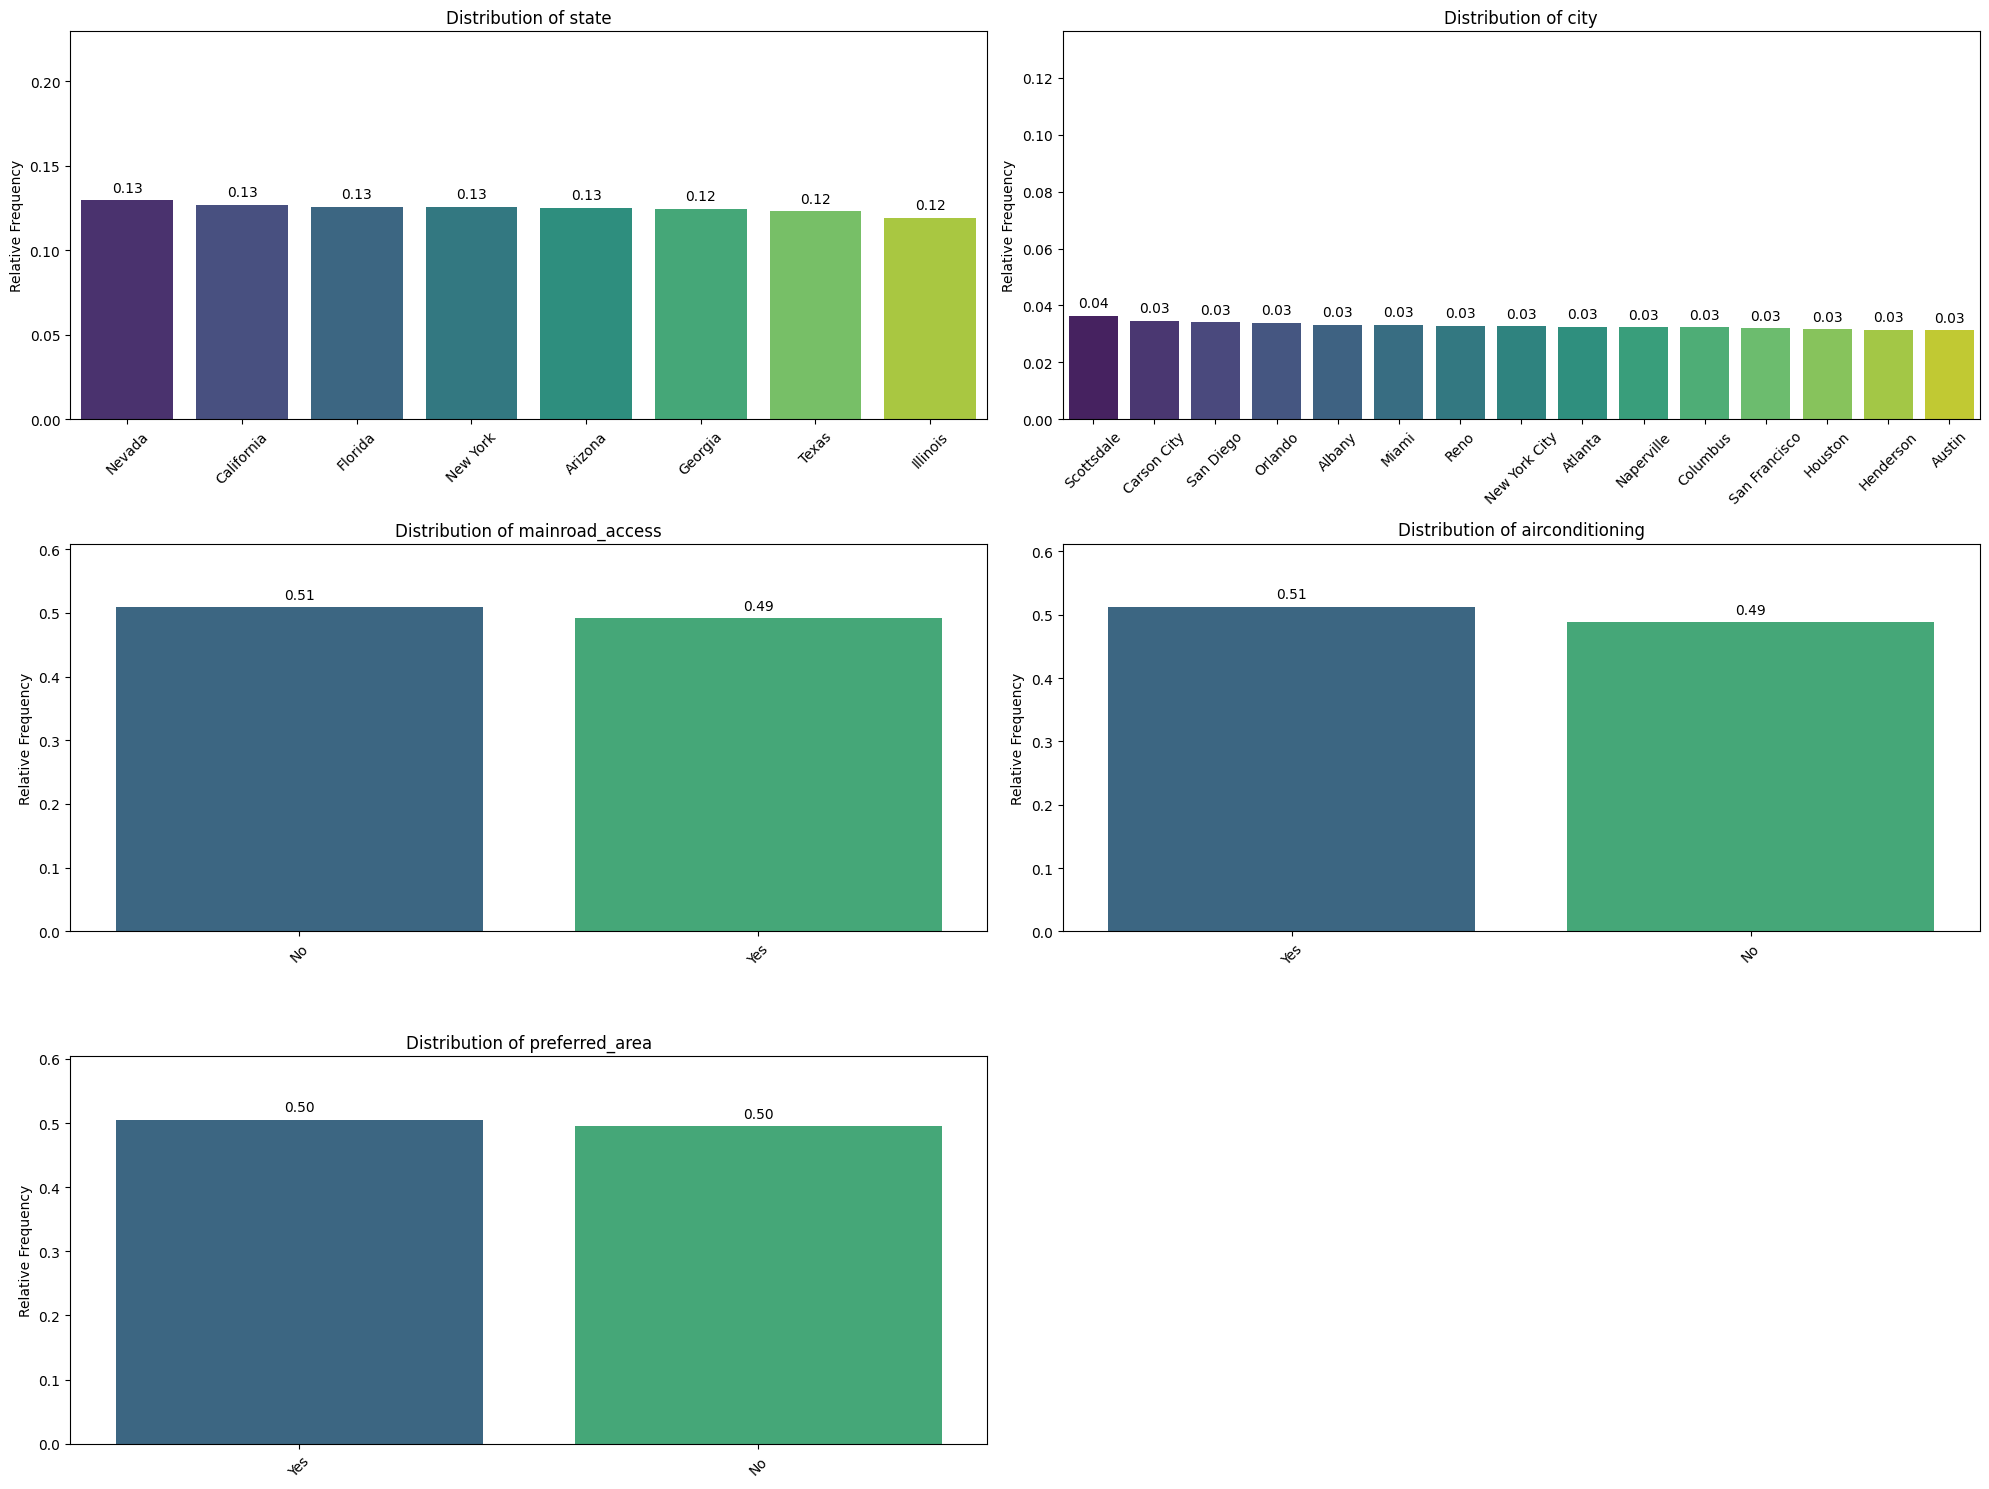

In [282]:
dpf.plot_categorical_distribution(train_set, cat_cols, relative = True, show_values = True, limit = 15)

*It seems to be quite balanced in terms of category features.*

(13, 2)


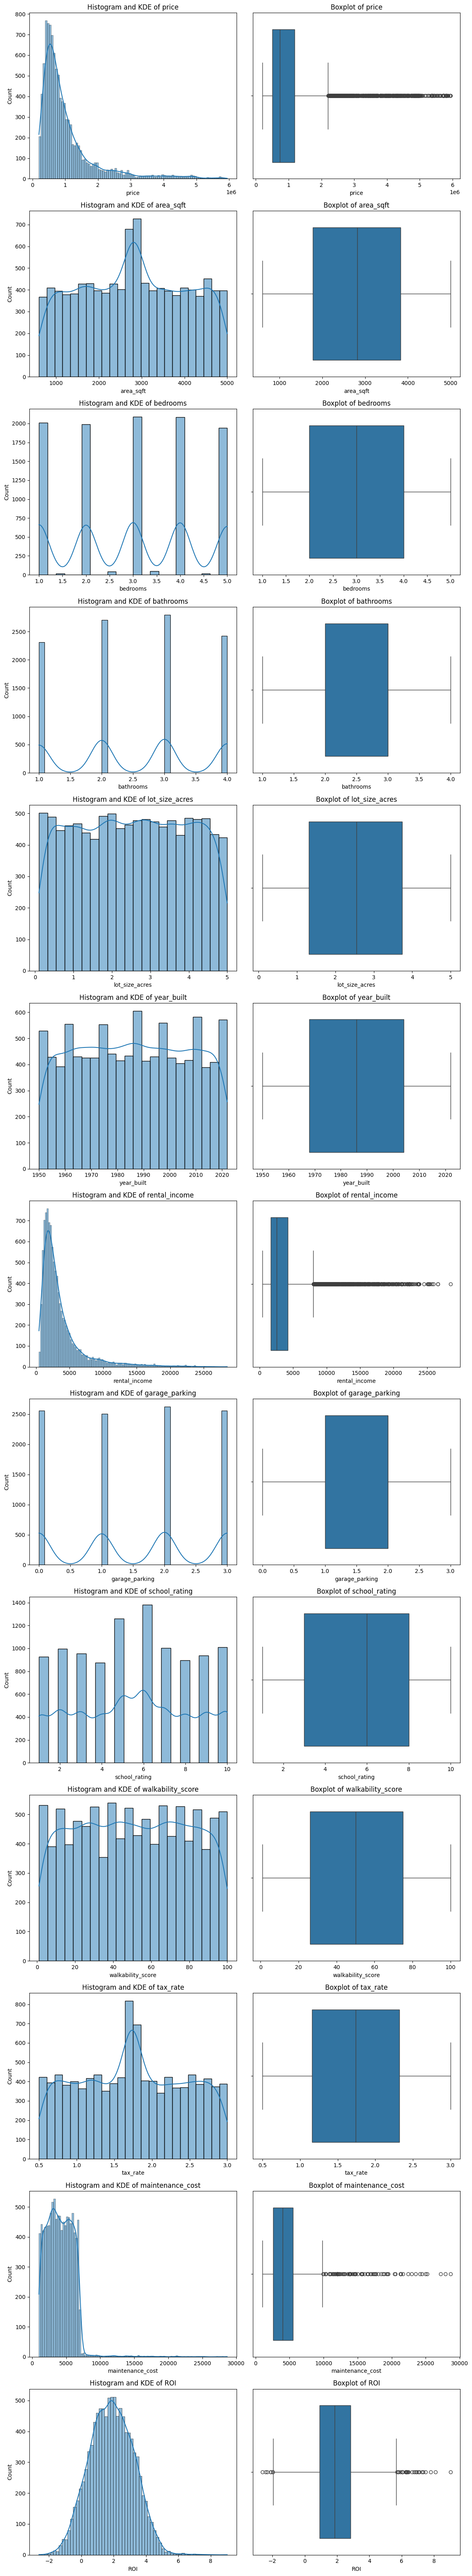

In [283]:
dpf.plot_combined_graphs(train_set, num_cols)

- **Property price**: *Shows a distribution skewed to the right, where most properties have low prices, but there are some significantly more expensive properties (outliers). Strong presence of outliers at the top of the price range.*   

- **Rental income**: *Shows a skewed distribution to the right, similar to that of prices, with most values concentrated in low income and some outliers. Presence of outliers at the high end, representing properties with unusually high rental income.*

- **Maintenance cost**: *Indicates an approximately uniform distribution, suggesting that maintenance costs are relatively evenly distributed among the available values. No significant outliers are present.*

- **ROI (Return of Investment)**: *Shows an approximately normal distribution of the ROI, with a peak around value 2 and a slight positive skewness. Most of the ROI values are concentrated between approximately 1 and 3, with some outliers to the left (negative or close to zero values).*  

#### 4.2. Bivariate analysis (Relationships between key variables and ROI)

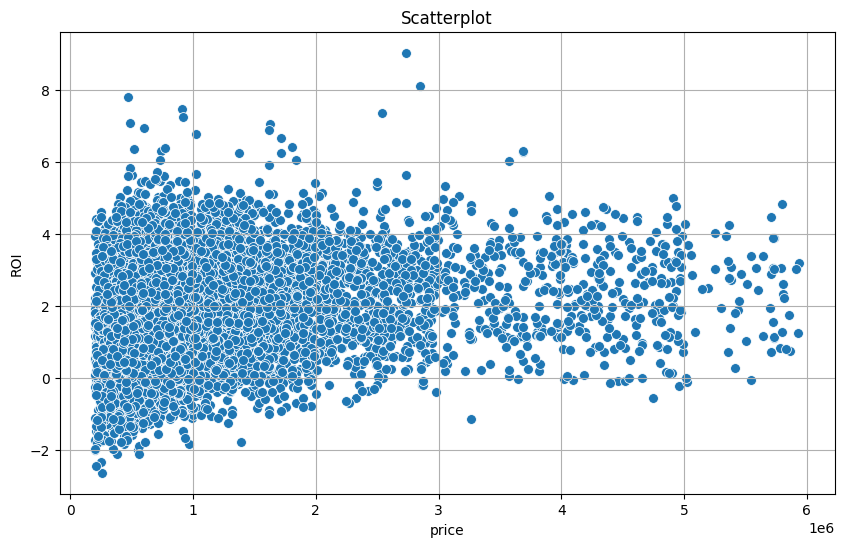

In [284]:
dpf.scatterplot_with_correlation(train_set, column_x = train_set["price"], column_y = train_set["ROI"])

- **ROI vs Price**: *Negative relationship. More expensive properties tend to have lower ROI. Cheaper properties show greater variability in ROI.*

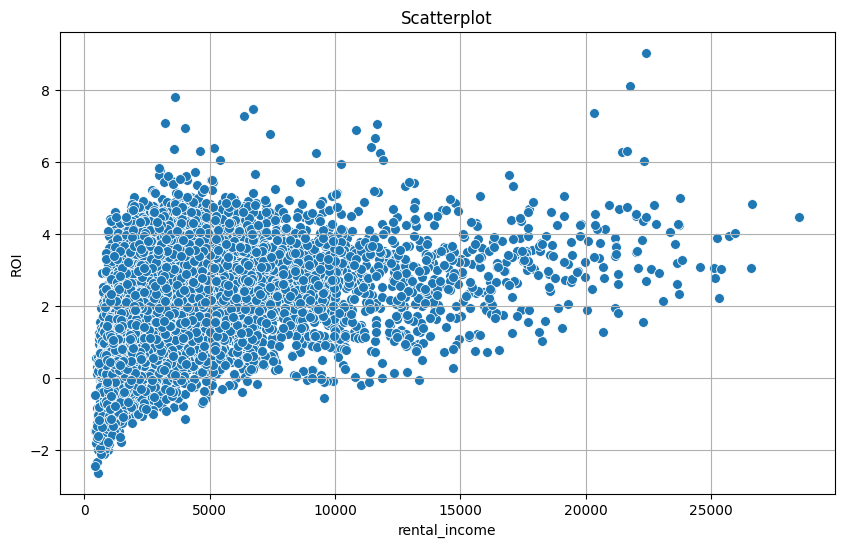

In [285]:
dpf.scatterplot_with_correlation(train_set, column_x = train_set["rental_income"], column_y = train_set["ROI"])

- **ROI vs Rental income**: *Positive relationship: higher rental income is associated with higher ROI.*

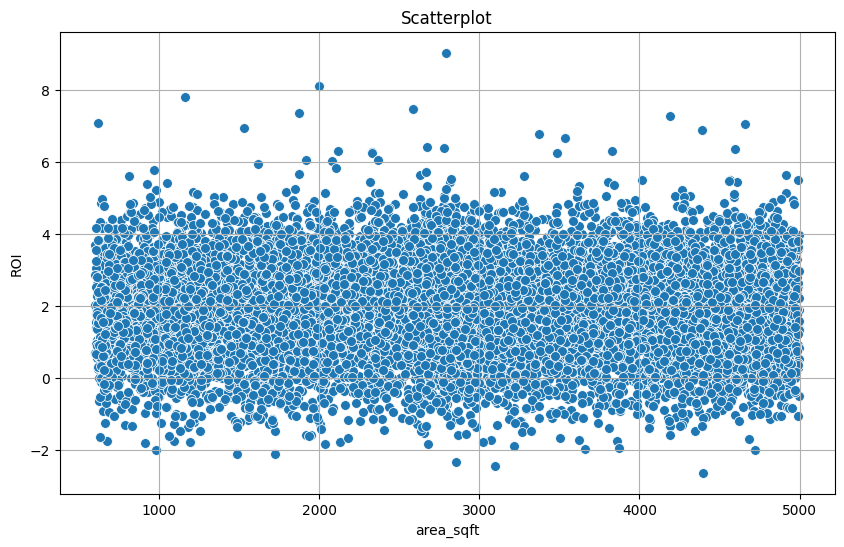

In [286]:
dpf.scatterplot_with_correlation(train_set, column_x = train_set["area_sqft"], column_y = train_set["ROI"])

- **ROI vs Area**: *The size of the area does not seem to have a direct impact on ROI.*

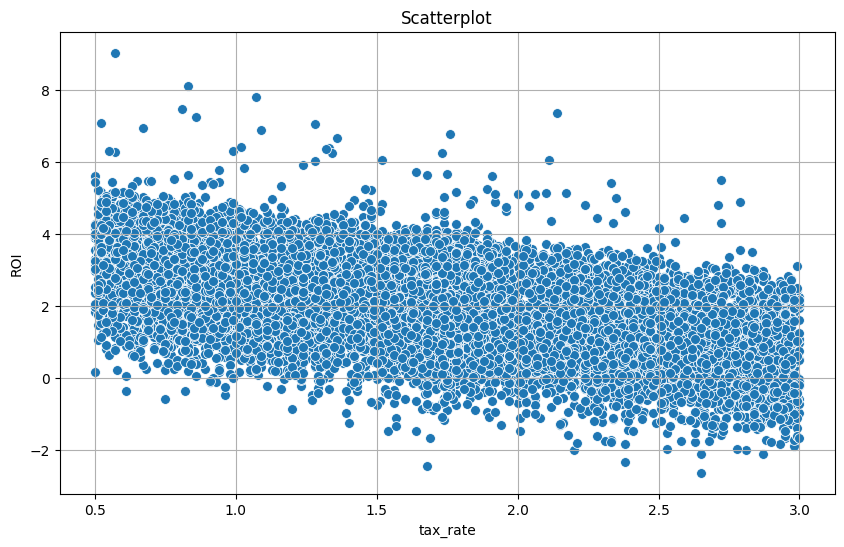

In [287]:
dpf.scatterplot_with_correlation(train_set, column_x = train_set["tax_rate"], column_y = train_set["ROI"])

- **ROI vs Taxes**: *Negative relationship. Higher tax rates tend to reduce ROI.*

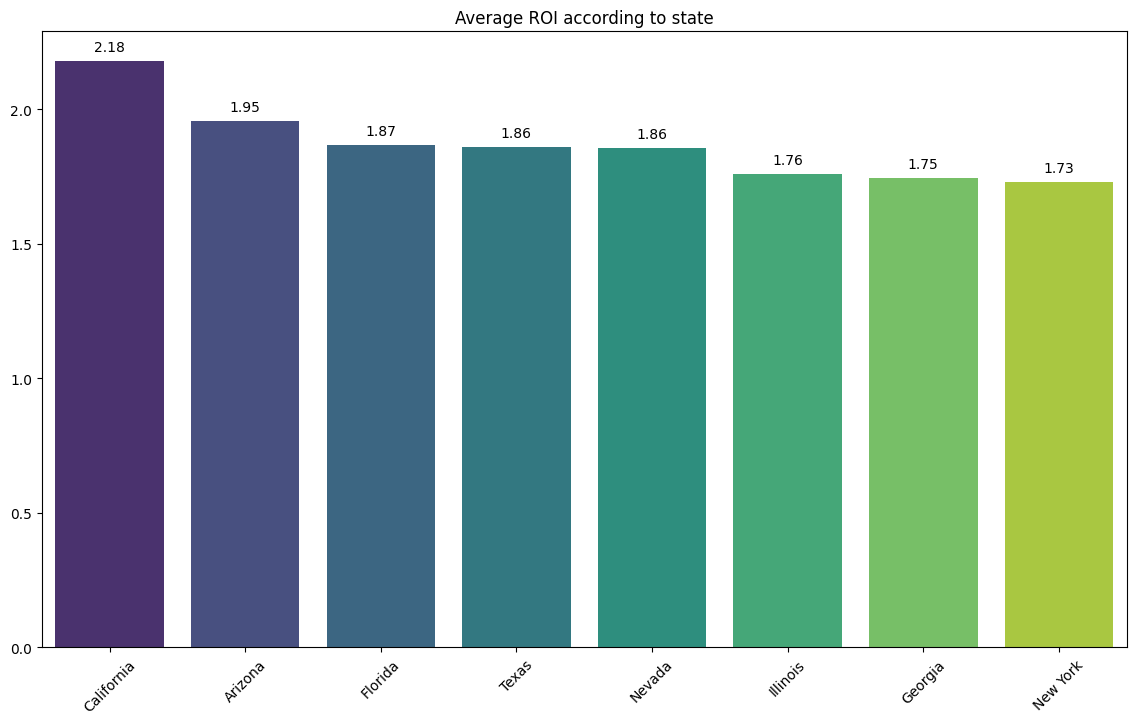

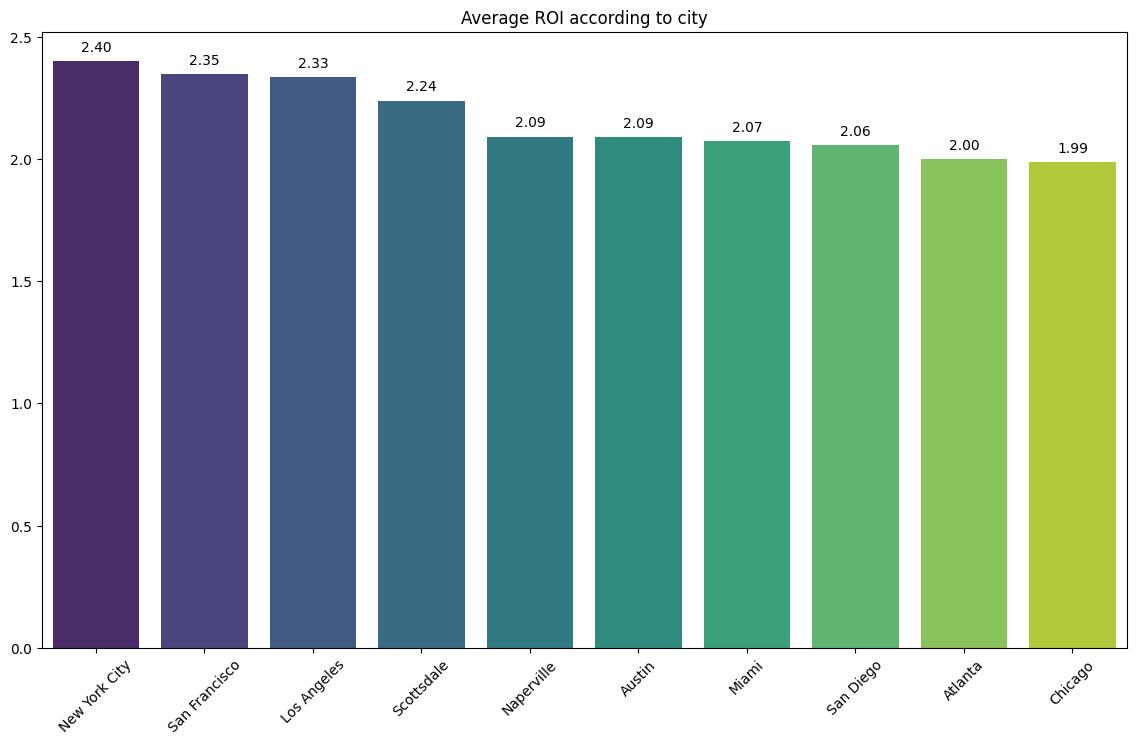

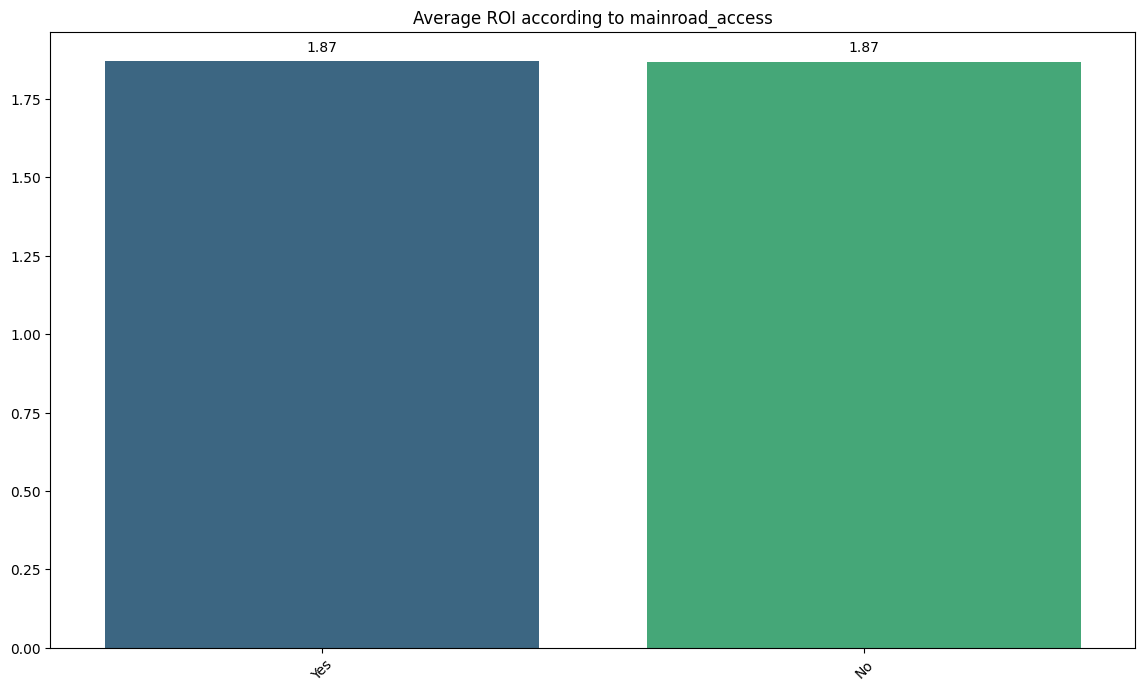

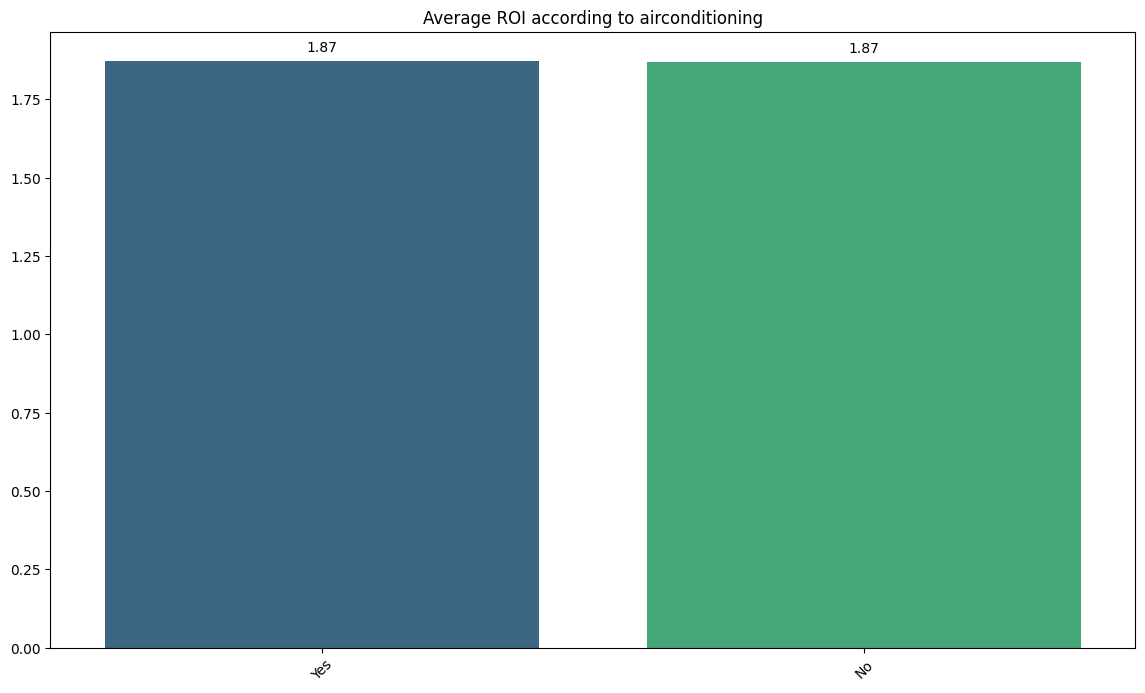

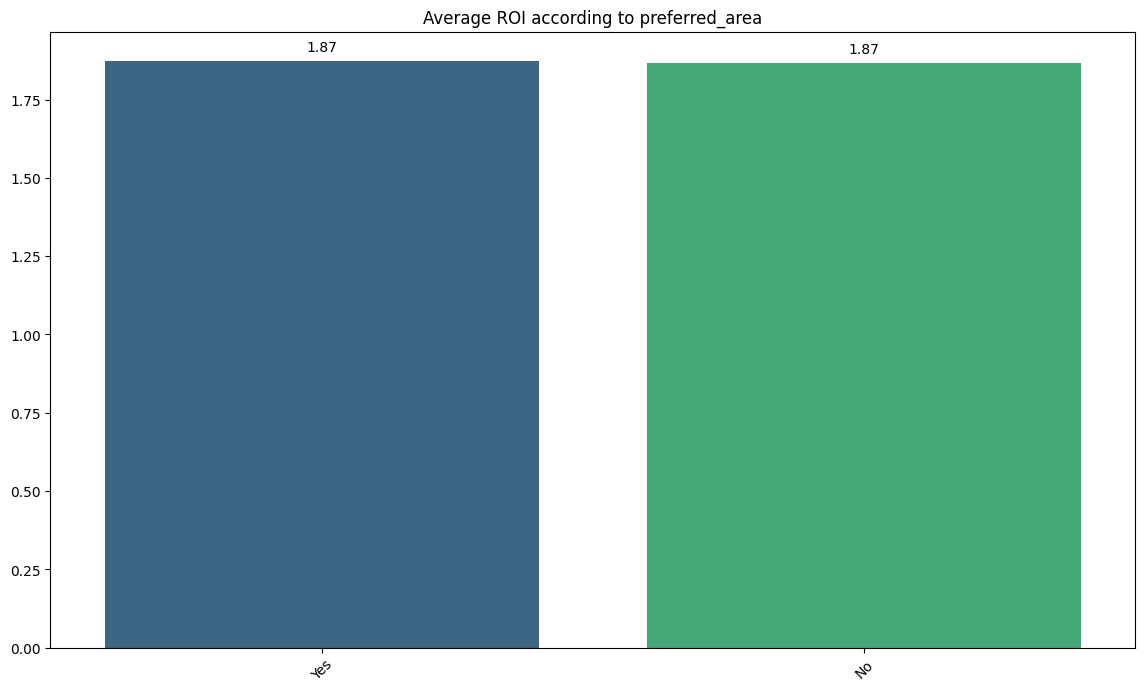

In [288]:
# Calculates the order of the categories based on the average of a specific numeric column.
def mean_order(data, col, num_col):
    return data.groupby(col)[num_col].mean().sort_values(ascending = False).index[:10]

dpf.plot_bar_with_values(data = train_set, cat_cols = cat_cols, num_col = 'ROI', title = 'Average ROI according to {}', order_func = mean_order);

*These graphs let us see that certain factors such as if the property is near a mainroad access, if it has airconditioning or if it is in a preferred area or not, will not affect ROI very much, and therefore we can eliminate them from our features.*

In [289]:
corr = train_set.corr(numeric_only = True)
np.abs(corr['ROI']).sort_values(ascending = False)

ROI                  1.000000
tax_rate             0.521806
rental_income        0.378039
price                0.172923
maintenance_cost     0.150487
bedrooms             0.016678
bathrooms            0.015365
area_sqft            0.014640
lot_size_acres       0.012530
school_rating        0.004647
walkability_score    0.002711
garage_parking       0.002435
year_built           0.000760
Name: ROI, dtype: float64

<Axes: >

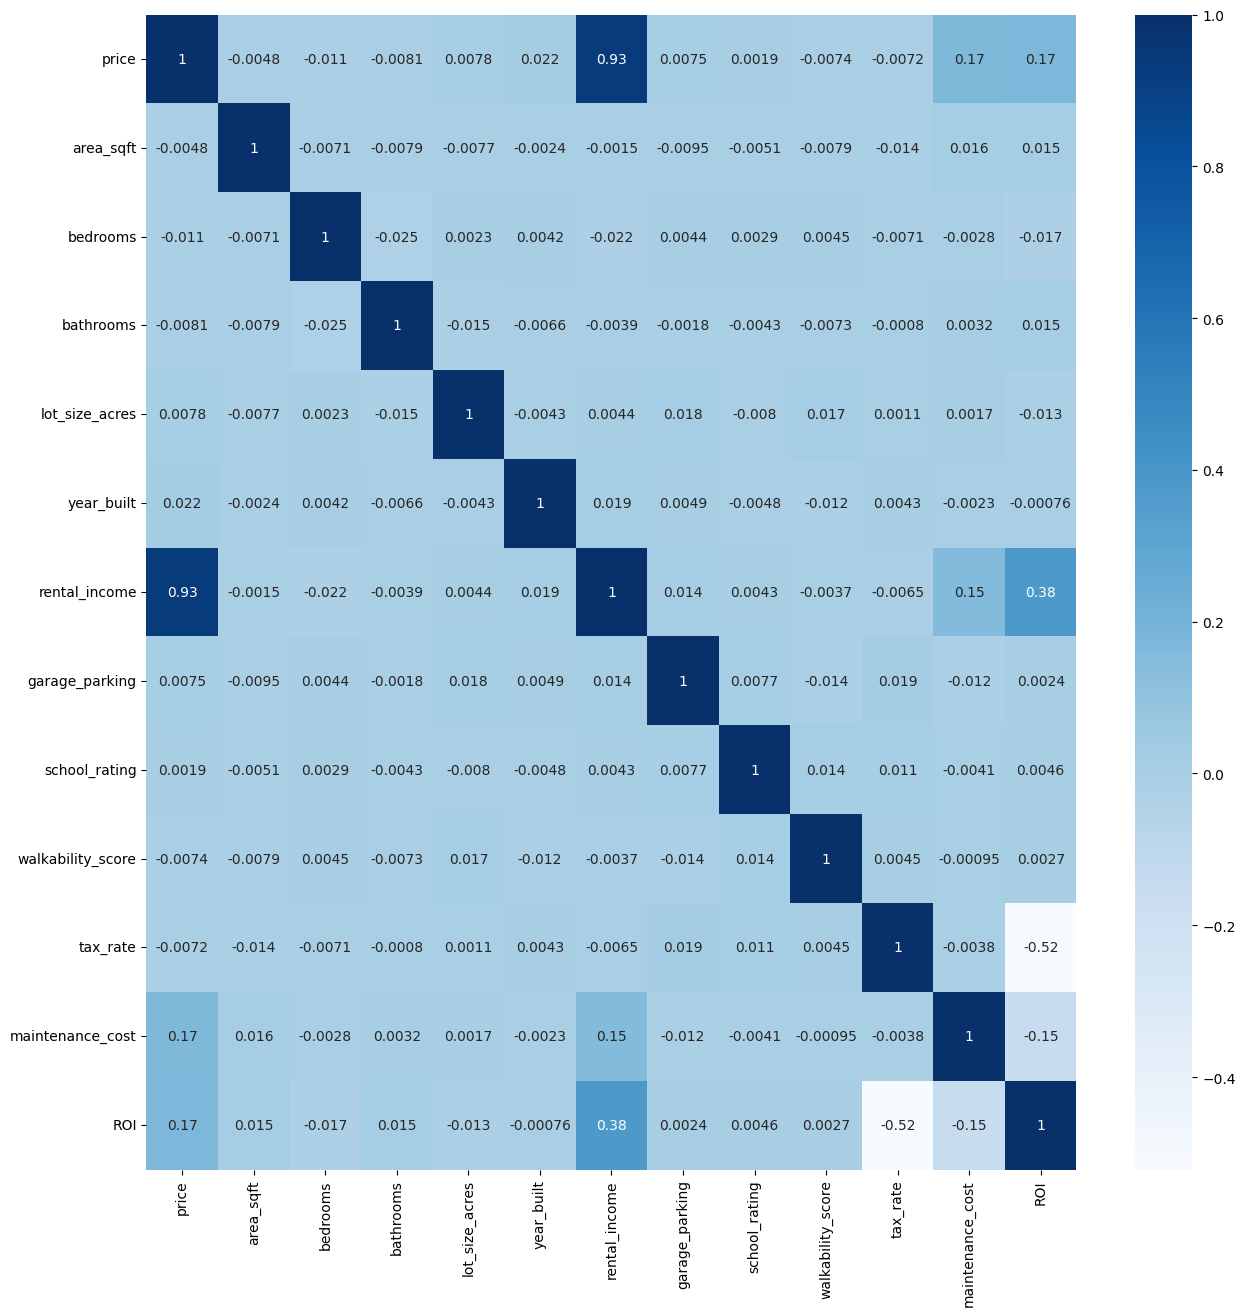

In [290]:
plt.figure(figsize = (15, 15))
sns.heatmap(corr, annot = True, cmap = "Blues")

*We see that the features we are most interested in are 'price', 'rental_income', 'tax_rate' and 'maitenance_cost', which makes a lot of sense, since they are the ones that are directly related mathematically.*

*I decide to keep features that meet > 0.01*

In [291]:
r_min = 0.010
features = corr['ROI'][(np.abs(corr['ROI']) > r_min)].index.to_list()
features

['price',
 'area_sqft',
 'bedrooms',
 'bathrooms',
 'lot_size_acres',
 'rental_income',
 'tax_rate',
 'maintenance_cost',
 'ROI']

*We will also keep the features 'state' and 'city'.*

In [292]:
features = ['state',
 'city',
 'price',
 'area_sqft',
 'bedrooms',
 'bathrooms',
 'rental_income',
 'school_rating',
 'tax_rate',
 'maintenance_cost',
 'ROI']

### 3. Imputation of null values

In [293]:
X_train = train_set[features]

# Verify if any missing values remain
X_train.isnull().sum()

state               0
city                0
price               0
area_sqft           0
bedrooms            0
bathrooms           0
rental_income       0
school_rating       0
tax_rate            0
maintenance_cost    0
ROI                 0
dtype: int64

In [294]:
# Step 1: Impute 'price' based on state, city, bedrooms, and area_sqft
median_price_grouped = X_train.groupby(["state", "city", "bedrooms"])["price"].transform("median")
X_train["price"] = X_train.apply(
    lambda row: row["price"] if not pd.isnull(row["price"]) else median_price_grouped[row.name],
    axis = 1)

# Step 2: Impute 'area_sqft' based on bedrooms and bathrooms
median_area_grouped = X_train.groupby(["bedrooms", "bathrooms"])["area_sqft"].transform("median")
X_train["area_sqft"] = X_train.apply(
    lambda row: row["area_sqft"] if not pd.isnull(row["area_sqft"]) else median_area_grouped[row.name],
    axis = 1)

# Step 3: Impute 'bedrooms' based on area_sqft
median_bedrooms_grouped = X_train.groupby(["area_sqft"])["bedrooms"].transform("median")
X_train["bedrooms"] = X_train.apply(
    lambda row: row["bedrooms"] if not pd.isnull(row["bedrooms"]) else median_bedrooms_grouped[row.name],
    axis = 1)

# Step 4: Impute 'bathrooms' based on bedrooms
median_bathrooms_grouped = X_train.groupby(["bedrooms"])["bathrooms"].transform("median")
X_train["bathrooms"] = X_train.apply(
    lambda row: row["bathrooms"] if not pd.isnull(row["bathrooms"]) else median_bathrooms_grouped[row.name],
    axis = 1)

# Step 5: Impute 'rental_income' based on price and location (state and city)
median_rental_pct_grouped = X_train.groupby(["state", "city"]).apply(
    lambda group: (group["rental_income"] / group["price"]).median())

X_train["rental_income"] = X_train.apply(
    lambda row: row["rental_income"] if not pd.isnull(row["rental_income"]) else row["price"] * median_rental_pct_grouped[row["state"], row["city"]],
    axis = 1)

# Step 6: Impute 'school_rating' based on state and city
median_school_rating_grouped = X_train.groupby(["state", "city"])["school_rating"].transform("median")
X_train["school_rating"] = X_train.apply(
    lambda row: row["school_rating"] if not pd.isnull(row["school_rating"]) else median_school_rating_grouped[row.name],
    axis = 1)

# Step 7: Impute 'tax_rate' based on state
median_tax_rate_grouped = X_train.groupby("state")["tax_rate"].transform("median")
X_train["tax_rate"] = X_train.apply(
    lambda row: row["tax_rate"] if not pd.isnull(row["tax_rate"]) else median_tax_rate_grouped[row.name],
    axis = 1)

# Step 8: Impute 'maintenance_cost' based on price and area_sqft
X_train["maintenance_cost"] = X_train.apply(
    lambda row: row["maintenance_cost"] if not pd.isnull(row["maintenance_cost"]) else (row["price"] * 0.005) + (row["area_sqft"] * 0.1),
    axis = 1)

# Step 9: Impute 'ROI' using the formula
X_train["ROI"] = X_train.apply(
    lambda row: row["ROI"]
    if not pd.isnull(row["ROI"])
    else (
        (row["rental_income"] * 12 - row["maintenance_cost"] - (row["price"] * row["tax_rate"] / 100))
        / row["price"]) * 100,
    axis = 1,)

# Verify that all specified columns are fully imputed
X_train.isnull().sum()

state               0
city                0
price               0
area_sqft           0
bedrooms            0
bathrooms           0
rental_income       0
school_rating       0
tax_rate            0
maintenance_cost    0
ROI                 0
dtype: int64

*As we have a fairly large dataset, we will eliminate the columns that still have nulls, since it will be better to do that than to put data that does not match the reality.*

In [295]:
X_train.dropna(inplace = True)

In [296]:
X_train.isnull().sum()

state               0
city                0
price               0
area_sqft           0
bedrooms            0
bathrooms           0
rental_income       0
school_rating       0
tax_rate            0
maintenance_cost    0
ROI                 0
dtype: int64

In [297]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10239 entries, 668 to 860
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   state             10239 non-null  object 
 1   city              10239 non-null  object 
 2   price             10239 non-null  float64
 3   area_sqft         10239 non-null  float64
 4   bedrooms          10239 non-null  float64
 5   bathrooms         10239 non-null  float64
 6   rental_income     10239 non-null  float64
 7   school_rating     10239 non-null  float64
 8   tax_rate          10239 non-null  float64
 9   maintenance_cost  10239 non-null  float64
 10  ROI               10239 non-null  float64
dtypes: float64(9), object(2)
memory usage: 959.9+ KB
